# Chapter 2 Foundations of Data Science
##Data science end-to-end scenario

#  **Tutorial: Data Science Process in Python (Hands-On for ECE Students)**


In [ ]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style="ticks")
%matplotlib inline


# Step 1: Scoping the Problem

1.   Define the Objective: Ask: What engineering question are we solving?

      **Given historical household electricity usage and contextual features (time, day, month, weekend), predict the next period’s Global Active Power consumption?**

2. Identify Inputs and Outputs

      **Inputs (features)**: what data we can measure. Voltage, current, temperature, signal strength, sensor readings.

      **Output (target)**: what we want to predict. Target: Global_active_power

3. Determine Problem Type

      **Regression** → Predict a continuous value (e.g., energy consumption in kWh).

      **Classification** → Predict a category (e.g., device “normal” vs. “faulty”).

      **Clustering/Anomaly Detection**→ Find unusual patterns in sensor signals.

      **Time Series Forecasting** → Predict future values (e.g., next 24h power usage).

## Step 2: Data Collection/Acquisition


In [ ]:
from google.colab import drive
# 1. Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Define the path (adjust to where your file is located inside Drive)
file_path = '/content/drive/MyDrive/ece333/household_power_consumption.txt'

# 3. Load the dataset
df = pd.read_csv(file_path, sep=';')

# 4. Display first 5 rows
df.head(200)


/tmp/ipython-input-3568227013.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
195,16/12/2006,20:39:00,3.204,0.078,232.500,13.600,0.000,0.000,16.0
196,16/12/2006,20:40:00,3.232,0.078,233.630,13.800,0.000,0.000,17.0
197,16/12/2006,20:41:00,3.254,0.074,234.430,13.800,0.000,0.000,17.0
198,16/12/2006,20:42:00,3.376,0.050,234.630,14.400,0.000,0.000,17.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
print("Shape:", df.shape)




Shape: (2075259, 9)


## Data Type Conversion

In [ ]:
# Time Series
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df = df.drop(columns=['Date', 'Time'])


In [ ]:
df.dtypes


,0
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64
DateTime,datetime64[ns]


In [ ]:
df.head(100)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
95,4.224,0.090,231.960,18.200,0.000,1.000,16.0,2006-12-16 18:59:00
96,4.070,0.088,231.990,17.400,0.000,1.000,17.0,2006-12-16 19:00:00
97,3.612,0.090,232.360,15.600,0.000,2.000,16.0,2006-12-16 19:01:00
98,3.458,0.090,232.710,14.800,0.000,1.000,17.0,2006-12-16 19:02:00


In [ ]:
df = df.set_index('DateTime')

In [ ]:
df.replace("?", np.nan, inplace=True)

print("\nMissing values:\n", df.isnull().sum())



Missing values:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [ ]:
print("\nMissing values:\n",df.dropna(inplace=True))


Missing values:
 None


In [ ]:
df.isnull.sum()

In [ ]:
cols_to_convert = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2'
]

df[cols_to_convert] = df[cols_to_convert].astype(float)


In [ ]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


### Missing Values

2. Choose Strategy

Case A: Small gaps (few missing rows in a continuous timeline)

Use forward fill (ffill) and backward fill (bfill):

```
df.fillna(method="ffill", inplace=True)  # fill forward
df.fillna(method="bfill", inplace=True)  # fill backward if start is NaN

```

Case B: Larger missing chunks (but still reasonable)

Impute with rolling median/mean to preserve local trends:


```
df['Global_active_power'] = df['Global_active_power'].fillna(
    df['Global_active_power'].rolling(window=10, min_periods=1, center=True).median()
)

```

Case C: Entire column has large missing proportion

If >30–40% missing, either:

Drop that column (if not crucial), or

Use advanced imputation (KNN imputer, interpolation).



```
df.interpolate(method="time", inplace=True)
```







##3. Exploratory Data Analysis (EDA)

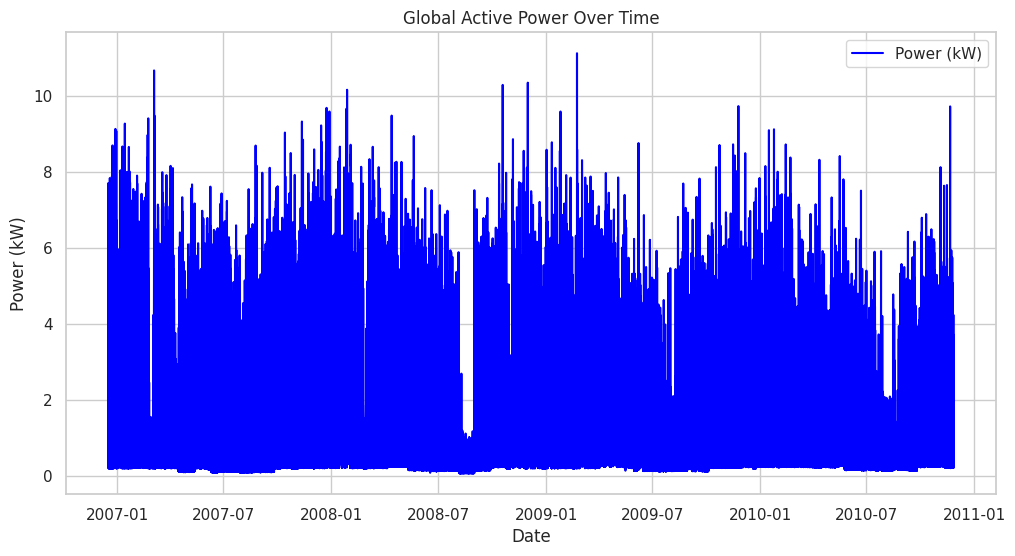

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DateTime', y='Global_active_power', label='Power (kW)', color='blue')

plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.title('Global Active Power Over Time')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'].dropna(), bins=50, color='red', kde=True)
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power')
plt.show()
